In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sales_data = pd.read_csv('sales_data.csv')

Below is a breakdown of my analysis for Sales_data
1. Import the sales_data csv into a data frame and view the sales data
2. Get the  number of rows and columns in the data set

In [41]:
#view the sales_data data frame
sales_data.head()

,Product,Region,Price,Units Sold,Sale Date
0,Product_43,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05


In [4]:
#get the total number of rows and columns in the dataset
sales_data.shape

(1050, 5)

Identify the missing data in the each column and decide to either fill them in or delete them. IF we want to fill out the missing data, we have to visualise the data to determine if it is a skewed data set or not. 
The data is not normally directed, therefore we are going to use the median to fill up most numerical missing figures

In [5]:
#view the summary details of the dataset
sales_data.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,942,945.000000,943.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2023-07-31
freq,30,112,NaN,NaN,2
mean,NaN,NaN,108.628011,10.200424,NaN
std,NaN,NaN,167.350086,3.247589,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.420000,8.000000,NaN
50%,NaN,NaN,64.640000,10.000000,NaN
75%,NaN,NaN,142.310000,12.000000,NaN


<AxesSubplot:xlabel='Product', ylabel='Count'>

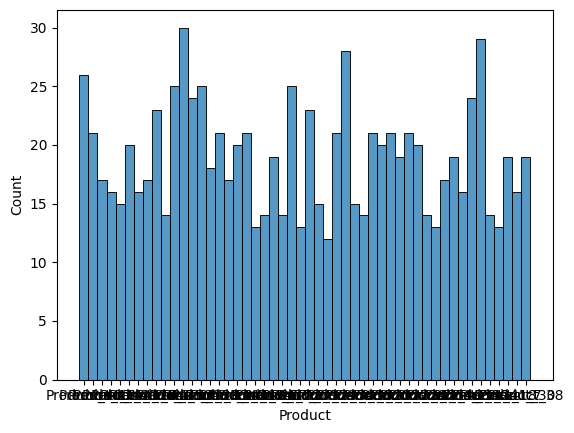

In [6]:
#view the data to see if it is skewed 
sns.histplot(sales_data['Product'])


I filled out the missing products by determining the top products sold in each region. This was stored in a dictionary called 'Regions_product_dict'. After this, I checked the regions with the missing products and filled up the missing products with the top product sold in that region.

For the missing region, I created a dictionary (Product_region_dict) with all the top regions for each product and filled the missing regions by mapping it to its top Product. 

A new dataframe was created called no_missing_sales_data and the missing data were filled up in this new dataframe.

For all missing price and units sold, the median was used to fill up all missing data. The median was chosed because the data does not have a normal distrubution 

Once all the data were filled up in the no_missing_sales_data dataframe, all remaining null data in the dataset were removed. 

I decided to use this cleaning approach as it would allow me to reduce the amount of bias in the data while still able to fill up the missing data

My conclusion on the data can be found below after my data cleaning

In [7]:
#fill in missing data for product by region
#get each product by region

sales_data.groupby('Product')['Region'].describe()

,count,unique,top,freq
Product,,,,
Product_1,19,9,Region_5,3
Product_10,20,10,Region_8,5
Product_11,12,7,Region_10,3
Product_12,13,6,Region_6,3
Product_13,18,7,Region_9,4
Product_14,12,7,Region_1,3
Product_15,20,10,Region_8,4
Product_16,14,10,Region_5,3
Product_17,19,9,Region_7,3


In [8]:
#get each top product in the different region
sales_data.groupby('Region')['Product'].describe()

,count,unique,top,freq
Region,,,,
Region_1,80,41,Product_43,4
Region_10,84,41,Product_4,5
Region_2,88,40,Product_49,6
Region_3,81,39,Product_4,6
Region_4,79,40,Product_45,6
Region_5,100,45,Product_8,5
Region_6,77,38,Product_20,5
Region_7,87,39,Product_3,5
Region_8,85,37,Product_10,5


In [9]:
#save the groupby in a new variable and reset the index from region to nothing
temp_table = sales_data.groupby('Region')['Product'].describe()
temp_table.reset_index(inplace=True)
temp_table.head()



,Region,count,unique,top,freq
0,Region_1,80,41,Product_43,4
1,Region_10,84,41,Product_4,5
2,Region_2,88,40,Product_49,6
3,Region_3,81,39,Product_4,6
4,Region_4,79,40,Product_45,6


In [10]:
#create a dic with all the products which are top sellers in the different regions
Regions_product_dict = temp_table.set_index('Region').to_dict()['top']
print(Regions_product_dict)

{'Region_1': 'Product_43', 'Region_10': 'Product_4', 'Region_2': 'Product_49', 'Region_3': 'Product_4', 'Region_4': 'Product_45', 'Region_5': 'Product_8', 'Region_6': 'Product_20', 'Region_7': 'Product_3', 'Region_8': 'Product_10', 'Region_9': 'Product_50'}


In [11]:
no_missing_sales_data = sales_data
#Get the index number of all Products with null value 
region_wnull_product = no_missing_sales_data[no_missing_sales_data['Product'].isnull()].index
#Get the index number of all Regions with null  value 
null_region_row = no_missing_sales_data[no_missing_sales_data['Region'].isnull()].index

In [18]:
#fill the missing data of products by regions with the top sellers in the dictionary 
#save all the regions of all missing products
no_missing_sales_data['Product'] = no_missing_sales_data['Product'].fillna(no_missing_sales_data['Region'].map(Regions_product_dict))

In [19]:
no_missing_sales_data.head()

,Product,Region,Price,Units Sold,Sale Date
0,Product_43,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05


In [22]:
#save the groupby in a new variable and reset the index from region to nothing
Pro_table = sales_data.groupby('Product')['Region'].describe()
Pro_table.reset_index(inplace=True)
Pro_table.head()


,Product,count,unique,top,freq
0,Product_1,19,9,Region_5,3
1,Product_10,31,10,Region_8,16
2,Product_11,12,7,Region_10,3
3,Product_12,13,6,Region_6,3
4,Product_13,18,7,Region_9,4


In [35]:
#create a dic with all the Regions which are top buyers in the different Product fill in missing data
Product_region_dict = Pro_table.set_index('Product').to_dict()['top']
no_missing_sales_data['Region'] = no_missing_sales_data['Region'].fillna(no_missing_sales_data['Product'].map(Product_region_dict))

In [37]:
no_missing_sales_data.head()

,Product,Region,Price,Units Sold,Sale Date
0,Product_43,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05


In [43]:
no_missing_sales_data.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,1038,1038,945.000000,943.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2023-07-31
freq,41,120,NaN,NaN,2
mean,NaN,NaN,108.628011,10.200424,NaN
std,NaN,NaN,167.350086,3.247589,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.420000,8.000000,NaN
50%,NaN,NaN,64.640000,10.000000,NaN
75%,NaN,NaN,142.310000,12.000000,NaN


<AxesSubplot:xlabel='Price', ylabel='Count'>

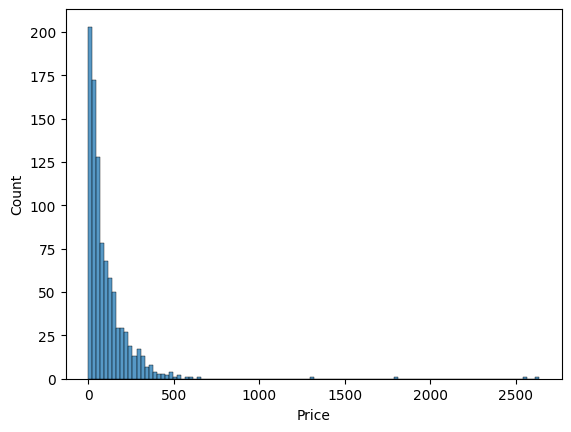

In [44]:
sns.histplot(no_missing_sales_data['Price'])

In [45]:
#get the median price 
no_missing_sales_data['Price'] = no_missing_sales_data['Price'].fillna(no_missing_sales_data.groupby('Product')['Price'].transform('median'))

In [47]:
#get the median unit sold by each region to fill in the missing value for unit sold in each region
no_missing_sales_data.groupby('Region')['Units Sold'].median()

Region
Region_1     11.0
Region_10    10.0
Region_2     10.0
Region_3     10.0
Region_4     10.0
Region_5     10.0
Region_6     10.0
Region_7     10.0
Region_8     11.0
Region_9     10.0
Name: Units Sold, dtype: float64

In [54]:
#create a dictionary of average unit sold in each region
Region_units_sold = pd.DataFrame(no_missing_sales_data.groupby('Region')['Units Sold'].median())
Region_units_sold.reset_index(inplace=True)
Region_Units_sold_dict = Region_units_sold.set_index('Region').to_dict()['Units Sold']
no_missing_sales_data['Units Sold'] = no_missing_sales_data['Units Sold'].fillna(no_missing_sales_data['Region'].map(Region_Units_sold_dict))
no_missing_sales_data.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,1038,1038,1049.000000,1049.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2023-07-31
freq,41,120,NaN,NaN,2
mean,NaN,NaN,104.575291,10.203051,NaN
std,NaN,NaN,159.454727,3.081859,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,30.240000,8.000000,NaN
50%,NaN,NaN,63.870000,10.000000,NaN
75%,NaN,NaN,130.430000,12.000000,NaN


In [131]:
#group sales date by month and year
#convert to date and time format on df
no_missing_sales_data['Con_Sale Date'] = pd.to_datetime(no_missing_sales_data['Sale Date'], format='%Y-%m-%d %H:%M:%S')
no_missing_sales_data['Month Year'] = no_missing_sales_data['Con_Sale Date'].dt.to_period('M')
no_missing_sales_data['Month Year'] = no_missing_sales_data['Month Year'].astype(str)


In [77]:
#delete the remaining empty data
no_missing_sales_data = no_missing_sales_data.dropna()
no_missing_sales_data.isnull().sum()


Product          0
Region           0
Price            0
Units Sold       0
Sale Date        0
Con_Sale Date    0
Month Year       0
dtype: int64

In [98]:
#What Product has the highest Sale and at what month ?
no_missing_sales_data.dtypes

Product                  object
Region                   object
Price                   float64
Units Sold              float64
Sale Date                object
Con_Sale Date    datetime64[ns]
Month Year       datetime64[ns]
dtype: object

In [90]:

no_missing_sales_data.head()

,Product,Region,Price,Units Sold,Sale Date,Con_Sale Date,Month Year
0,Product_43,Region_1,72.87,10.0,2022-01-01,2022-01-01,2022-01
1,Product_40,Region_2,46.19,10.0,2022-01-02,2022-01-02,2022-01
2,Product_1,Region_5,75.88,4.0,2022-01-03,2022-01-03,2022-01
3,Product_6,Region_8,143.47,8.0,2022-01-04,2022-01-04,2022-01
4,Product_44,Region_4,122.54,10.0,2022-01-05,2022-01-05,2022-01


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Region_1'),
  Text(1, 0, 'Region_2'),
  Text(2, 0, 'Region_5'),
  Text(3, 0, 'Region_8'),
  Text(4, 0, 'Region_4'),
  Text(5, 0, 'Region_10'),
  Text(6, 0, 'Region_7'),
  Text(7, 0, 'Region_6'),
  Text(8, 0, 'Region_9'),
  Text(9, 0, 'Region_3')])

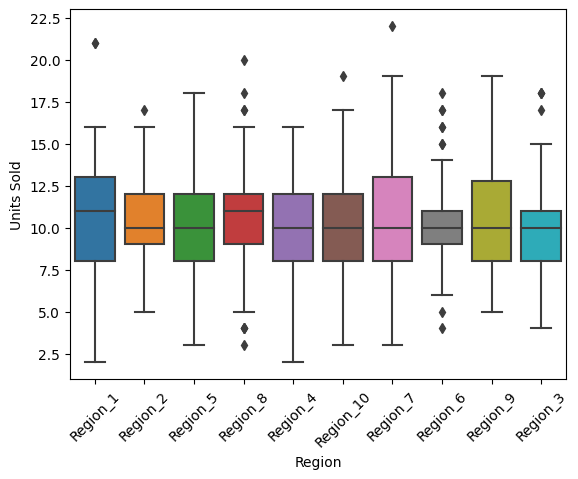

In [123]:
#What is the month with the highest sale 
sns.boxplot(data = no_missing_sales_data, x='Region',y='Units Sold')
plt.xticks(rotation=45)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

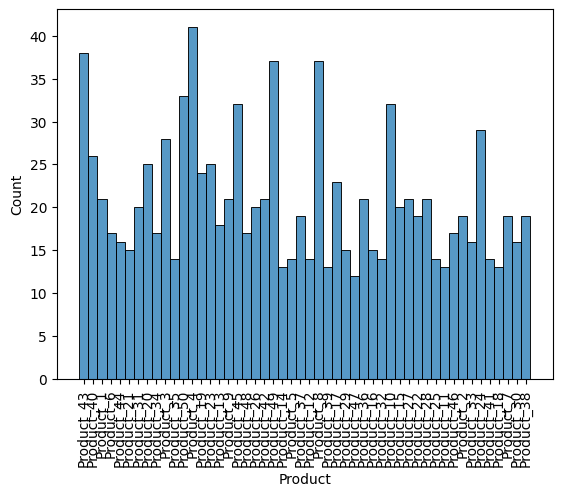

In [137]:
sns.histplot(no_missing_sales_data['Product'])
plt.xticks(rotation=90)

The top Product sold is Product_4. The top regions that purchase Product_4 are Region_10 and Region_3. However, the region with the most purchases is Region_5 which has purchases most in Product_8. 
From the data analysis below, I have the following conclusions:

1. The company can increase sales with producing more of Product_4 in Region_10 and Region_3 

2. It should promote the purchase and produce more of the following Products - (11,19,29,39,40,41 and 44) in region_10  as they show promises in Region_10

3. There would be more sale in product_43 if there more of it in Region_1 

4. There should be an increase in Product_8 as it has the most regions which purchased it 
5. There should be more distrubution of products in Region_5 as they purchase the most products

In [161]:
#Get the top products sold 
no_missing_sales_data['Product'].describe()

count          1038
unique           50
top       Product_4
freq             41
Name: Product, dtype: object

In [162]:
#top region
no_missing_sales_data['Region'].describe()

count         1038
unique          10
top       Region_5
freq           120
Name: Region, dtype: object

In [147]:
#Get the top Products sold in the Top regions
no_missing_sales_data.groupby('Product')['Region'].describe()

,count,unique,top,freq
Product,,,,
Product_1,21,9,Region_5,5
Product_10,32,10,Region_8,17
Product_11,13,7,Region_10,4
Product_12,14,6,Region_6,4
Product_13,18,7,Region_9,4
Product_14,13,7,Region_1,4
Product_15,20,10,Region_8,4
Product_16,15,10,Region_5,4
Product_17,23,9,Region_7,7


In [159]:
no_missing_sales_data.groupby('Product')['Units Sold'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
Product_1,21.0,10.190476,2.993644,4.0,9.00,10.0,12.00,17.0
Product_10,32.0,11.375000,3.270099,4.0,9.00,11.0,14.00,18.0
Product_11,13.0,11.461538,3.907586,5.0,9.00,11.0,14.00,19.0
Product_12,14.0,10.642857,3.934212,5.0,9.25,10.0,10.75,21.0
Product_13,18.0,10.666667,2.351470,7.0,9.25,10.0,11.75,16.0
Product_14,13.0,11.230769,3.166329,7.0,10.00,11.0,12.00,19.0
Product_15,20.0,10.800000,3.488326,3.0,9.00,10.5,13.00,18.0
Product_16,15.0,10.733333,3.514595,3.0,9.00,11.0,13.00,17.0
Product_17,23.0,9.826087,2.724505,4.0,8.50,10.0,11.00,16.0


In [151]:
no_missing_sales_data.groupby('Region')['Month Year'].describe()

,count,unique,top,freq
Region,,,,
Region_1,94,32,2023-11,8
Region_10,103,30,2022-10,6
Region_2,109,33,2024-01,6
Region_3,91,29,2022-05,7
Region_4,98,33,2022-01,8
Region_5,120,33,2022-11,7
Region_6,89,29,2024-08,6
Region_7,103,32,2024-03,8
Region_8,117,33,2022-01,9


In [152]:
no_missing_sales_data.groupby('Region')['Product'].describe()

,count,unique,top,freq
Region,,,,
Region_1,94,41,Product_43,17
Region_10,103,41,Product_4,10
Region_2,109,40,Product_49,21
Region_3,91,39,Product_4,14
Region_4,98,40,Product_45,19
Region_5,120,45,Product_8,18
Region_6,89,38,Product_20,14
Region_7,103,39,Product_3,13
Region_8,117,37,Product_10,17


In [157]:
no_missing_sales_data['Price'].describe(include='all')

count    1038.000000
mean      104.133121
std       159.792976
min         0.190000
25%        30.267500
50%        63.447500
75%       128.782500
max      2636.900000
Name: Price, dtype: float64